## requests 라이브러리와 urllib 라이브러리 비교
- 기존에는 urllib + bs4 셋트로 많이 사용됨
- 최근에는 requests + bs4 셋트로 많이 사용됨
- 기존 코드 중 일부가 urllib 을 사용하는 경우가 있으므로, 참고로 간단한 사용법만 익히기로 함

> 경우에 따라 urllib 송수신시 인코딩 처리가 달라서, urllib 으로는 정상적으로 데이터를 가져오는 경우가 간혹 있음 (예전 사이트의 경우)
> 최근에는 대부분의 사이트가 인코딩 처리를 유니코드로 설정하고 있으므로, 이런 경우는 극히 드물다고 보면 됨

- requests 라이브러리를 사용해서 크롤링을 진행하고,
  - 문제가 있어보이는 경우만, urllib 으로도 한번 실행해보면 좋음
 

### requests 라이브러리로 작성한 코드

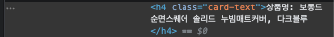

In [23]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://davelee-fun.github.io/')
soup = BeautifulSoup(res.content, 'html.parser')

data = soup.select('h4.card-text') 
for item in data: 
    print (item.get_text().strip()) #앞뒤 줄바꿈 삭제하기

상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
상품명: 슈에뜨룸 선인장 리플 침구 세트, 베이지
상품명: 선우랜드 레인보우 2단 문걸이용 옷걸이 _중형, 화이트, 상세페이지참조
상품명: 보드래 헬로우 누빔 매트리스커버, 핑크
상품명: 보드래 퍼펙트 누빔 매트리스커버, 차콜
상품명: 피아블 클래식 방수 매트리스커버, 화이트
상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키차콜그레이
상품명: 더자리 프레쉬 퓨어 매트리스 커버, 퓨어 차콜그레이
상품명: 몽쉐어 알러스킨 항균 매트리스 커버, 카키그레이
상품명: 쿠팡 브랜드 - 코멧 홈 40수 트윌 순면 100% 홑겹 매트리스커버, 그레이
상품명: 패브릭아트 항균 마이크로 원단 매트리스 커버, 아이보리
상품명: 바숨 순면 누빔 침대 매트리스커버, 차콜
상품명: WEMAX 다용도 문옷걸이, 화이트, 1개
상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 젠틀핑핑
상품명: 보몽드 순면스퀘어 누빔매트커버, 다크그레이
상품명: 보드래 국내산 순면 60수 누빔 매트리스커버, 그레이


### urllib 라이브러리로 작성한 코드

In [1]:
from urllib.request import urlopen #urlopen 함수만 가져오기!
from bs4 import BeautifulSoup

res = urlopen('https://davelee-fun.github.io/')
soup = BeautifulSoup(res, 'html.parser') #res.content(X)

data = soup.select('h4.card-text')
for item in data:
    print (item.get_text().strip())

상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
상품명: 슈에뜨룸 선인장 리플 침구 세트, 베이지
상품명: 선우랜드 레인보우 2단 문걸이용 옷걸이 _중형, 화이트, 상세페이지참조
상품명: 보드래 헬로우 누빔 매트리스커버, 핑크
상품명: 보드래 퍼펙트 누빔 매트리스커버, 차콜
상품명: 피아블 클래식 방수 매트리스커버, 화이트
상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키차콜그레이
상품명: 더자리 프레쉬 퓨어 매트리스 커버, 퓨어 차콜그레이
상품명: 몽쉐어 알러스킨 항균 매트리스 커버, 카키그레이
상품명: 쿠팡 브랜드 - 코멧 홈 40수 트윌 순면 100% 홑겹 매트리스커버, 그레이
상품명: 패브릭아트 항균 마이크로 원단 매트리스 커버, 아이보리
상품명: 바숨 순면 누빔 침대 매트리스커버, 차콜
상품명: WEMAX 다용도 문옷걸이, 화이트, 1개
상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 젠틀핑핑
상품명: 보몽드 순면스퀘어 누빔매트커버, 다크그레이
상품명: 보드래 국내산 순면 60수 누빔 매트리스커버, 그레이


### HTTP response code (크롤링할 페이지가 없는 경우 확인 방법)
- HTTP 라는 프로토콜 규격에 따라서, 응답 데이터에 응답 코드(response code)를 넣어서 보내게 됨
  - requests 라이브러리의 경우, requests.get() 의 리턴변수.status_code 에서 응답 코드를 확인할 수 있음
  - HTTP 규격에 따라 ```응답 코드가 200 인 경우는 정상 응답, 그렇지 않으면 무언가 문제가 있다```는 뜻
    - 참고: https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C
    - 특정 페이지 요청 후, 응답 코드가 200 이 아니면, 특정 페이지가 없는 경우 (또는 결과적으로는 문제가 있는 경우)라고 인지할 수 있음

- 100번대 (조건부 응답)
- 200번대 (성공)
- 300번대 (리다이렉션 완료)
- 400번대 (요청 오류)
- 500번대 (서버 오류)

In [3]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://davelee-fun.github.io/xxx')
if res.status_code != 200: #200이 아니면 문제가 있다는 것임! 
    print ('페이지 없음')
else:
    soup = BeautifulSoup(res.content, 'html.parser') #.content >> HTML코드가 들어감

    data = soup.select('h4.card-text')
    for item in data:
        print (item.get_text())

페이지 없음


### 여러 페이지를 한번에 크롤링하는 기법

In [28]:
import requests
from bs4 import BeautifulSoup

for page_num in range(10):
    if page_num == 0:
        res = requests.get('https://davelee-fun.github.io/')
    else:
        res = requests.get('https://davelee-fun.github.io/page' + str(page_num + 1))
    soup = BeautifulSoup(res.content, 'html.parser')

    data = soup.select('h4.card-text')
    for item in data:
        print (item.get_text().strip())

상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
상품명: 슈에뜨룸 선인장 리플 침구 세트, 베이지
상품명: 선우랜드 레인보우 2단 문걸이용 옷걸이 _중형, 화이트, 상세페이지참조
상품명: 보드래 헬로우 누빔 매트리스커버, 핑크
상품명: 보드래 퍼펙트 누빔 매트리스커버, 차콜
상품명: 피아블 클래식 방수 매트리스커버, 화이트
상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키차콜그레이
상품명: 더자리 프레쉬 퓨어 매트리스 커버, 퓨어 차콜그레이
상품명: 몽쉐어 알러스킨 항균 매트리스 커버, 카키그레이
상품명: 쿠팡 브랜드 - 코멧 홈 40수 트윌 순면 100% 홑겹 매트리스커버, 그레이
상품명: 패브릭아트 항균 마이크로 원단 매트리스 커버, 아이보리
상품명: 바숨 순면 누빔 침대 매트리스커버, 차콜
상품명: WEMAX 다용도 문옷걸이, 화이트, 1개
상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 젠틀핑핑
상품명: 보몽드 순면스퀘어 누빔매트커버, 다크그레이
상품명: 보드래 국내산 순면 60수 누빔 매트리스커버, 그레이
상품명: 보드래 퍼펙트 누빔 매트리스커버, 베이지핑크
상품명: 쿠팡 브랜드 - 코멧 홈 40수 순면 누빔 매트리스커버, 챠콜
상품명: 바숨 순면 누빔 침대 매트리스커버, 화이트
상품명: 프랑떼 항균 방수 매트리스커버, 화이트
상품명: 보몽드 순면스퀘어 솔리드 누빔매트커버, 다크블루
상품명: 네이쳐리빙 피아블 클래식 방수 매트리스커버, 그레이
상품명: 쿠팡 브랜드 - 코멧 홈 순면 매트리스커버, 베이지
상품명: 타카타카 프리미엄 나노 화이바 누빔 매트리스 커버, 프렌치불독
상품명: 더자리 에코항균 마이크로 매트리스커버, 밀키그레이
상품명: 보몽드 순면스퀘어 누빔매트커버, 화이트
상품명: 피아블 클래식 방수 매트리스커버, 화이트
상품명: 쿠팡 브랜드 - 코멧 홈 순면 매트리스커버, 차콜그레이
상품명: 쉬즈홈 모던그리드 순면 여름이불 베개커버 패드세트, 핑크
상품명: 스코홈 빅리플 여름 차렵이불패드 3종 세트, 마린그레이
상품명: